#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

In [3]:
import pandas as pd


In [4]:
df = pd.read_csv("imdb_top_10000.txt", sep='\t', names = ["imdbID","title","year","score","votes","runtime","genres"])

In [5]:
df.head()

imdbID                            title  year  score   votes    runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

##Cleaning:Examining the dataframe - quick frame


In [6]:
#Checking the datatypes
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [7]:
#Checking for NaN values
df.isna().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     1
dtype: int64

In [8]:
#Trying to locate where the missing values occur
df[df.genres.isna() == True]

imdbID             title  year  score  votes   runtime genres
7917  tt0990404  Chop Shop (2007)  2007    7.2   2104  84 mins.    NaN

##Cleaning: Dealing with missing Values

In [9]:
df.shape

(10000, 7)

In [10]:
#Treat the missing or valid values in your dataframe
df.dropna(subset = ['genres'], inplace = True)

In [11]:
df.shape

(9999, 7)

In [12]:
#Check the column datatypes again
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

## 2. Asking Questions

Which movie has a highest vote in a given year?

## 3. Parsing and Completing the DataFrame

There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

In [13]:
time = df.runtime[0]
time

'142 mins.'

In [14]:
#convert runtime into int
time1 = df.runtime[0].replace('mins.','')
time1

'142 '

In [15]:
#To change the datatypes of the runtime, firstly we have to remove mins from it
def get_runtime(time):
  time1 = time.replace('mins.', '')
  return time1

df['runtime'] = df.runtime.map(get_runtime)
df.head()


imdbID                            title  year  score   votes runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479    142    
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065    154    
2  tt0137523                Fight Club (1999)  1999    8.8  458173    139    
3  tt0133093                The Matrix (1999)  1999    8.7  448114    136    
4  tt1375666                 Inception (2010)  2010    8.9  385149    148    

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [16]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [17]:
#now Change the dtypes of runtime
df.runtime = df.runtime.astype('int')
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime      int64
genres      object
dtype: object

In [18]:
df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [19]:
#removing year from Title

In [20]:
genre_set = set()
for genres in df.genres:
  genre_set.update(genres.split('|'))

In [21]:
len(genre_set)

24

In [22]:
#to create 24 different columns for the diff genre
#itearte through genre_set and update the column in each iteration
for genres in genre_set:
  df[genres] = [genres in row.split("|") for row in df.genres]


In [23]:
df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  Musical  Romance  Western  ...  Comedy  \
0                       Crime|Drama    False    False    False  ...   False   
1                    Crime|Thriller    False    False    False  ...   False   
2            Drama|Mystery|Thriller    False    False    False  ...   False   
3           Action|Adventure|Sci-Fi    False    False    False  ...   False   
4  Action|Adventure|Sci-Fi|Thriller    False    False    False  ...   False   

   Adventure  Fantasy  Reality-TV  Thriller  Sport  Biography   News  Mystery  \
0      False    False       False     False  False      False  False    False   
1      False    False       False      True  False      False  False    False   
2      False    False       False      True  False      False  False     True   
3       True    False       False     False  False      False  False    False   
4       True    False       False      True  False      False  False    False   

   Action  
0   False  
1   False  
2   False  
3    True  
4    True  

[5 rows x 31 columns]

In [24]:
df.shape

(9999, 31)

## 4. EDA

In [25]:
df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  Musical  Romance  Western  ...  Comedy  \
0                       Crime|Drama    False    False    False  ...   False   
1                    Crime|Thriller    False    False    False  ...   False   
2            Drama|Mystery|Thriller    False    False    False  ...   False   
3           Action|Adventure|Sci-Fi    False    False    False  ...   False   
4  Action|Adventure|Sci-Fi|Thriller    False    False    False  ...   False   

   Adventure  Fantasy  Reality-TV  Thriller  Sport  Biography   News  Mystery  \
0      False    False       False     False  False      False  False    False   
1      False    False       False      True  False      False  False    False   
2      False    False       False      True  False      False  False     True   
3       True    False       False     False  False      False  False    False   
4       True    False       False      True  False      False  False    False   

   Action  
0   False  
1   False  
2   False  
3    True  
4    True  

[5 rows x 31 columns]

1. Bar Plot

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
ndf = df[['title','score','votes']]
ndf


title  score   votes
0     The Shawshank Redemption (1994)    9.2  619479
1                 Pulp Fiction (1994)    9.0  490065
2                   Fight Club (1999)    8.8  458173
3                   The Matrix (1999)    8.7  448114
4                    Inception (2010)    8.9  385149
...                               ...    ...     ...
9995                   Meduzot (2007)    7.0    1357
9996            Daltry Calhoun (2005)    5.2    1357
9997    The Quiller Memorandum (1966)    6.5    1356
9998                      Taal (1999)    6.5    1356
9999            The Navigators (2001)    6.9    1356

[9999 rows x 3 columns]

In [34]:
minscore=ndf['score'].min()
print("The minimum score is", minscore)
maxscore = ndf['score'].max()
print("The maximum score is", maxscore)

The minimum score is 1.5
The maximum score is 9.2


In [36]:
yeardf = df.groupby("year")
df2000 = yeardf.get_group(2010)

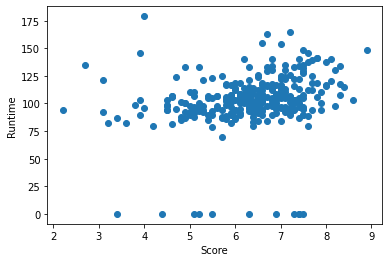

In [38]:
x = df2000.score
y = df2000.runtime

plt.scatter(x,y)
plt.xlabel('Score')
plt.ylabel('Runtime')
plt.show()


In [39]:
year99 = yeardf[['score','runtime']].mean()[:10]

<function matplotlib.pyplot.show>

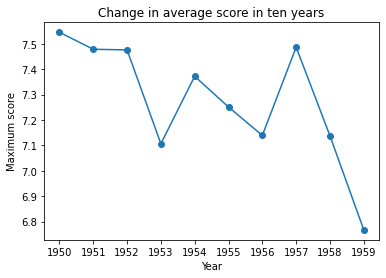

In [40]:
plt.plot(year99.index,year99.score,marker='o')
plt.xticks(year99.index)
plt.title('Change in average score in ten years')
plt.xlabel("Year")
plt.ylabel("Maximum score")
plt.show

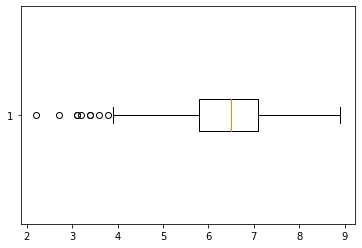

In [41]:
plt.boxplot(df2000.score,vert=False)
plt.show()

## 5. Determining Best Movies

In [42]:
df_new= df.groupby("year")
df_new



In [43]:
len(df_new)

62

In [44]:
year_check = df.groupby("year", sort=False)
year_check

In [45]:
# finding for minimum score from the dataframe
for key, valuedf in year_check:
    highest_score = valuedf[valuedf['score'] == valuedf.score.max()]
    print(highest_score.title,highest_score.year,highest_score.score)
    break

0    The Shawshank Redemption (1994)
Name: title, dtype: object 0    1994
Name: year, dtype: int64 0    9.2
Name: score, dtype: float64


#The best movie name is The Shawshank Redemption(1994) with a highest score that is 9.2

## 6. Trends in Popularity of Genres

In [30]:
#finding the most popular genre
#firstly convert to list
genredf = df[list(genre_set)]
genredf.head()

Musical  Romance  Western  Sci-Fi  Film-Noir  Animation  Music  Crime  \
0    False    False    False   False      False      False  False   True   
1    False    False    False   False      False      False  False   True   
2    False    False    False   False      False      False  False  False   
3    False    False    False    True      False      False  False  False   
4    False    False    False    True      False      False  False  False   

   Adult  Family  ...  Comedy  Adventure  Fantasy  Reality-TV  Thriller  \
0  False   False  ...   False      False    False       False     False   
1  False   False  ...   False      False    False       False      True   
2  False   False  ...   False      False    False       False      True   
3  False   False  ...   False       True    False       False     False   
4  False   False  ...   False       True    False       False      True   

   Sport  Biography   News  Mystery  Action  
0  False      False  False    False   False  
1  False      False  False    False   False  
2  False      False  False     True   False  
3  False      False  False    False    True  
4  False      False  False    False    True  

[5 rows x 24 columns]

In [31]:
genre_result = genredf.sum()
genre_result

Musical        260
Romance       2441
Western        235
Sci-Fi         897
Film-Noir       40
Animation      314
Music          371
Crime         1867
Adult            9
Family         754
Drama         5697
Horror        1215
War            512
History        358
Comedy        3922
Adventure     1313
Fantasy        916
Reality-TV       1
Thriller      2832
Sport          288
Biography      394
News             1
Mystery       1009
Action        1891
dtype: int64

In [32]:
#find the sum and sort in descending to find the highest
#we will display the result in graph

y = genre_result.sort_values(ascending = False)[:10] #
x = y.index

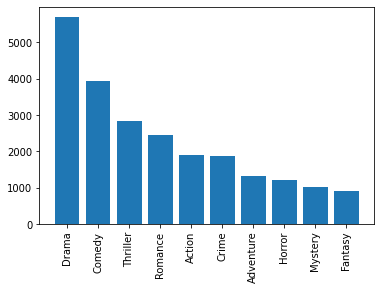

In [33]:
import matplotlib.pyplot as plt
plt.bar(x,y)
#applied xticks to rotate the x label 90 degree
plt.xticks(rotation = 90)
plt.show()

#From the given 24 genres, the most popular genre is Drama. Out of 9999 movies, 5697 movies has 'Drama' as its genre.